# University of Melbourne - Predict Grant Applications

## Note: the notebook presents not just the final model but the full thought process and data investigation

##### Around the world, the pool of funds available for research grants is steadily shrinking (in a relative sense). In Australia, success rates have fallen to 20-25 per cent, meaning that most academics are spending valuable time making applications that end up being rejected.

##### The model can be used by the university to predict which grant applications are likely to be successful, so that less time is wasted on applications that are unlikely to succeed. The model will also shed some light on what factors are important in determining whether an application will succeed. 


Task: Given a dataset with 6000 applications for student grants from University of Melbourne from 2004 to 2008. Each application has 38 diferent attributes (Date of birth of the applicant, country, program, research fields, Home Language, Sponsor Code, Grade level, etc.). The Grand_Status column indicates 1 if successful application, 0 otherwise. 
My goal is to prepare date for feeding into the model, look for the best possible model by choosing different classifications algorithms and also choose the best apllicable hyperparameters using GridSearch Method.  

Full version of the dataset can be found on: https://www.kaggle.com/c/unimelb.

To run this workflow, you will need:
- NumPy: 1.10.4 и Up
- Pandas: 0.17.1 и Up
- Scikit-learn: 0.17 и Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## Data Set Description

In [2]:
data = pd.read_csv('data.csv')
print (data.shape)
data.head()

(6000, 39)


,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


In [3]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']
print (y.shape)

(6000,)


In [4]:
X.columns

Index(['Sponsor.Code', 'Grant.Category.Code',
       'Contract.Value.Band...see.note.A', 'RFCD.Code.1', 'RFCD.Percentage.1',
       'RFCD.Code.2', 'RFCD.Percentage.2', 'RFCD.Code.3', 'RFCD.Percentage.3',
       'RFCD.Code.4', 'RFCD.Percentage.4', 'RFCD.Code.5', 'RFCD.Percentage.5',
       'SEO.Code.1', 'SEO.Percentage.1', 'SEO.Code.2', 'SEO.Percentage.2',
       'SEO.Code.3', 'SEO.Percentage.3', 'SEO.Code.4', 'SEO.Percentage.4',
       'SEO.Code.5', 'SEO.Percentage.5', 'Person.ID.1', 'Role.1',
       'Year.of.Birth.1', 'Country.of.Birth.1', 'Home.Language.1',
       'Dept.No..1', 'Faculty.No..1', 'With.PHD.1',
       'No..of.Years.in.Uni.at.Time.of.Grant.1',
       'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1',
       'A..1', 'A.1', 'B.1', 'C.1'],
      dtype='object')

## Data pre-processing

From the requirements of the Logistic Regression:
- all $X$ has to be numberical value (for all categorical columns, some numerical subsitution solution have to be found)
- $X$ cannot have empty values. That means all values that are missing need to be substituted with some other value in case of numerical attribute vs some "dummy" category for categorical attribute



In [5]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


Observe that there's both numerical and categorical attributes, so let's separate before we start.

In [6]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))
categorical_cols

['RFCD.Code.4',
 'A..1',
 'RFCD.Code.2',
 'SEO.Code.1',
 'A.1',
 'Role.1',
 'RFCD.Code.1',
 'RFCD.Code.5',
 'Country.of.Birth.1',
 'No..of.Years.in.Uni.at.Time.of.Grant.1',
 'Grant.Category.Code',
 'B.1',
 'Faculty.No..1',
 'C.1',
 'Dept.No..1',
 'Home.Language.1',
 'Person.ID.1',
 'Contract.Value.Band...see.note.A',
 'SEO.Code.2',
 'SEO.Code.5',
 'Sponsor.Code',
 'RFCD.Code.3',
 'SEO.Code.3',
 'With.PHD.1',
 'SEO.Code.4']

Also observe that there's definitely missing values of some of the columns.

In [7]:
data.dropna().shape

(213, 39)

This way will throw out most of the records, so obiously it will not work. 

We need to substitute NULLs with some values. There's different methods for doing that for both numerical and categorical attributes.

For $numerical$ columns:
- subsitute values with $0$ 
- subsitute values with $mean$

For $categorical$ columns:
- subsitute the missing values with a separate category (one for all). This is the most solid solution since it doesn not cause any data loss 

##  Handling Missing Values
1. For numerical columns, both methods will be done and then compared. X_real_zeros и X_real_mean will be the names for dataframes after substitution with mean and zeros. 
2. For categorical columns, missing values will substituted with NA


In [8]:
def calculate_means(num_data):
    means = np.zeros(num_data.shape[1])
    for j in range(num_data.shape[1]):
        to_sum = num_data.iloc[:,j]
        indices = np.nonzero(~num_data.iloc[:,j].isnull())[0]
        correction = np.amax(to_sum[indices])
        to_sum /= correction
        for i in indices:
            means[j] += to_sum[i]
        means[j] /= indices.size
        means[j] *= correction
    return pd.Series(means, num_data.columns)

In [9]:
#numerical X, NA filled with zeros
X_real_zeros = X[numeric_cols].fillna(0)
print (X_real_zeros.shape)
X_real_zeros.head()

(6000, 13)


,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0


In [10]:
#numerical X, NA filled with mean columns values
X_real_mean = X[numeric_cols].fillna(value=calculate_means(X[numeric_cols]))
print (X_real_mean.shape)
X_real_mean.sample(5)

(6000, 13)


,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
1367,100.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1975.0,1.0,0.0
51,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1965.0,1.0,6.0
4249,100.000000,0.000000,0.000000,0.000000,0.000000,40.00000,30.00000,20.000000,10.000000,0.000000,1955.0,0.0,7.0
4652,100.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1965.0,4.0,1.0
4783,50.000000,50.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1965.0,2.0,0.0


In [11]:
#categorical X, NA filled with 'NA'
X_cat = X[categorical_cols].fillna('NA').astype(str)
print (X_cat.shape)
X_cat.sample(5)

(6000, 25)


,RFCD.Code.4,A..1,RFCD.Code.2,SEO.Code.1,A.1,Role.1,RFCD.Code.1,RFCD.Code.5,Country.of.Birth.1,No..of.Years.in.Uni.at.Time.of.Grant.1,...,Home.Language.1,Person.ID.1,Contract.Value.Band...see.note.A,SEO.Code.2,SEO.Code.5,Sponsor.Code,RFCD.Code.3,SEO.Code.3,With.PHD.1,SEO.Code.4
4035,NA,0.0,NA,NA,0.0,CHIEF_INVESTIGATOR,NA,NA,Australia,>=0 to 5,...,NA,73717.0,B,NA,NA,222B,NA,NA,Yes,NA
5822,NA,2.0,NA,NA,9.0,CHIEF_INVESTIGATOR,NA,NA,Australia,more than 15,...,NA,64777.0,NA,NA,NA,34B,NA,NA,NA,NA
5118,0.0,3.0,0.0,730104.0,2.0,CHIEF_INVESTIGATOR,320702.0,0.0,Western Europe,>=0 to 5,...,Other,755517.0,NA,0.0,0.0,4D,0.0,0.0,Yes,0.0
4586,0.0,0.0,390305.0,750599.0,0.0,CHIEF_INVESTIGATOR,399999.0,0.0,Australia,>5 to 10,...,NA,66917.0,H,750702.0,0.0,2B,390102.0,750401.0,Yes,0.0
1820,0.0,0.0,280301.0,700102.0,0.0,CHIEF_INVESTIGATOR,280401.0,0.0,Australia,>=0 to 5,...,NA,45967.0,NA,0.0,0.0,2B,0.0,0.0,Yes,0.0


## Transorming categorical values

As mentioned above, we need to make sure that all the data is numerical, so categorical attributes need to be encoded. 
I will use one of the classic encoder methods: $One Hot Encoder$. This way we'll have one column for each value to compare vs. all other values.

Since the dataset is not big, I'll just use plain vanilla $DictVectorizer$. Very imortant here is to use the same encoder for test and train data. 

In [12]:
from sklearn.feature_extraction import DictVectorizer as DV

encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())
print (X_cat_oh.shape)

(6000, 5593)


$Important$: use the same random_state for all splits to avoid shuffling of the values after we combine categorical and numerical

In [13]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)
print (y_train.shape)
print (y_test.shape)
print (X_train_real_mean.shape)
print (X_test_real_mean.shape)
print (X_train_cat_oh.shape)
print (X_test_cat_oh.shape)

(4200,)
(1800,)
(4200, 13)
(1800, 13)
(4200, 5593)
(1800, 5593)


## GridSearchCV

So at this point we have a dataset that is ready to be fed into the LogisticRegrassion model. Due to a big number of attribute we'll definitely have to play around with regularization hyperparameters to avoid over-fitting. For that I'll use GridSearchCV to quickly cross validade my results across different $C$ (inverse lambda) and regularization types $(l1,l2)$.

I will use CV = 3 as number of folds, since I have computatinal limitations.    

My guess is that $L1 reguralizer$ would work a bit better since it also involves feature selection and number of attributes is not small (38). The model should be less complex, hence less prone to over-fitting. I will test Lasso ($L1 reguralizer$ at the end of the notebook ) 

$Note$: the default scoring method for Logistic Regression is $accuracy$ but I'll test the model on the test data using $AUC-ROC$, since it's more informative method and accounts for both precision and recall aspects of validating the classification models.Using $AUC-ROC$ method to test all of the parameters of 3 folds is too computationally intensive. 
   

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[row[0]['C'], 
               row[1], (np.sum((row[2]-row[1])**2)/(row[2].size-1))**0.5] for row in optimizer.cv_results_['mean_test_score']]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()

In [15]:
print (X_train_real_zeros.shape)
print (X_train_cat_oh.shape)
print (np.hstack( (X_train_real_zeros, X_train_cat_oh) ).shape)

(4200, 13)
(4200, 5593)
(4200, 5606)


In [16]:
#stacking numerical and categorical features
X_train_zeros = np.hstack( (X_train_real_zeros, X_train_cat_oh) )
X_train_mean = np.hstack( (X_train_real_mean, X_train_cat_oh) )
X_test_zeros = np.hstack( (X_test_real_zeros, X_test_cat_oh) )
X_test_mean = np.hstack( (X_test_real_mean, X_test_cat_oh) )

In [17]:
#GridSearchCV parameters
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty' : ['l1','l2']}
cv = 3
estimator = LogisticRegression(max_iter=5000)

###### PLAIN LOGISTIC REGRESSION RESULTS

In [18]:
estimator.fit(X_train_mean,y_train)
print(roc_auc_score(y_test, estimator.predict_proba(X_test_mean)[:, 1]))

0.8855999683227516


###### ADDING GRIDSEARCH WITH REGULARIZATION PARAMETERS

In [19]:
%%time
#GridSearchCV with zero fillna

optimizer_zeros = GridSearchCV(estimator, param_grid, cv=cv)
optimizer_zeros.fit(X_train_zeros, y_train)
print (optimizer_zeros)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
CPU times: user 23.3 s, sys: 1.45 s, total: 24.8 s
Wall time: 15.7 s


In [20]:
%%time
#GridSearchCV with mean fillna

optimizer_mean = GridSearchCV(estimator, param_grid, cv=cv)
optimizer_mean.fit(X_train_mean, y_train)

CPU times: user 1min 16s, sys: 1.68 s, total: 1min 17s
Wall time: 1min 11s


In [21]:
#plot_scores(optimizer_zeros)
#plot_scores(optimizer_mean)

In [22]:
#GridSearchCV with zero fillna
print ('Best parameter for GridSearchCV with zero fillna', optimizer_zeros.best_params_)
roc_auc_score_zeros = roc_auc_score(y_test, optimizer_zeros.best_estimator_.predict_proba(X_test_zeros)[:, 1])
print ('roc_auc_score_zeros', roc_auc_score_zeros)
#GridSearchCV with mean fillna
print ('Best parameter for GridSearchCV with mean fillna', optimizer_mean.best_params_)
roc_auc_score_mean = roc_auc_score(y_test, optimizer_mean.best_estimator_.predict_proba(X_test_mean)[:, 1])
print ('roc_auc_score_mean', roc_auc_score_mean)

Best parameter for GridSearchCV with zero fillna {'C': 0.5, 'penalty': 'l1'}
roc_auc_score_zeros 0.889161183986656
Best parameter for GridSearchCV with mean fillna {'C': 0.5, 'penalty': 'l1'}
roc_auc_score_mean 0.8896672775261057


As we can see that filling the nulls with means works a little better, as well as L1- regularization.
So I'll use those 2 moving forward

## Scaling the numerical variables 

Let's try to take a closer look into couple numerical attributes and their histograms.   

In [23]:
print(numeric_cols)

['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 'RFCD.Percentage.4', 'RFCD.Percentage.5', 'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3', 'SEO.Percentage.4', 'SEO.Percentage.5', 'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']


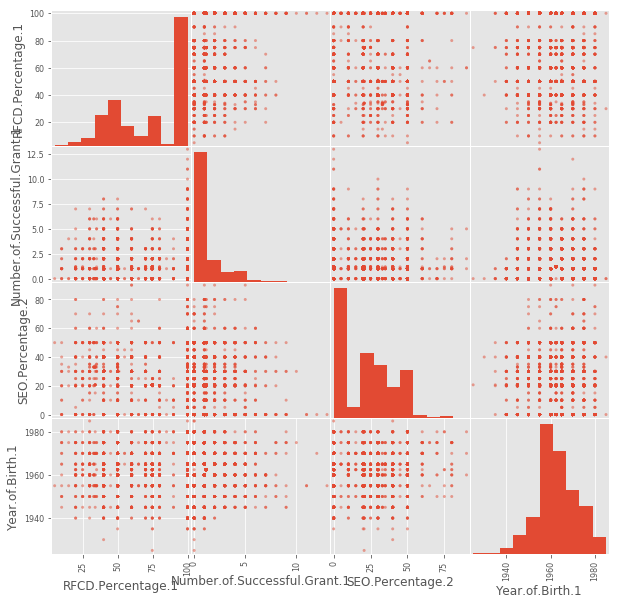

In [24]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_mean, columns=numeric_cols)
list_cols = ['RFCD.Percentage.1','Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

As we can see from the graphs, the attributes are very differenet from each other in terms of range of values (look at the range of axises x and y).

$Intuitevely$,this should not have a huge affect in the case of plain regression, since the smaller range values (modulus) with just have smaller weights. $However$, in case of a model with Regularization (where large weights are penalized), it can seroiusly affect performance of a model. 
Note: even though the score on the test sample can be marginally higher/ lower, modeling on scaled data should produce more accurate coefficients (weights).

Logistic regression is an algorithm that utilises gradient descent (plain or more advanced versions) to train your model (minimize loss function), and this will rely on selecting initial conditions. Poor initial conditions will lead to poor convergence resultsIn cases like this, we need to scale the attributes. 

I will use the most classical and widely used method - $Standardization$.Logistic Regression does not need data to be zero-centrered (unlike $PCA$ algorithm for example), so $Normalization$ is not needed. 

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$


In [25]:
from sklearn.preprocessing import StandardScaler

encoder = StandardScaler()

X_train_real_scaled = encoder.fit_transform(X_train_real_mean)
X_test_real_scaled = encoder.fit_transform(X_test_real_mean)

Let's look at the data again after scaling.

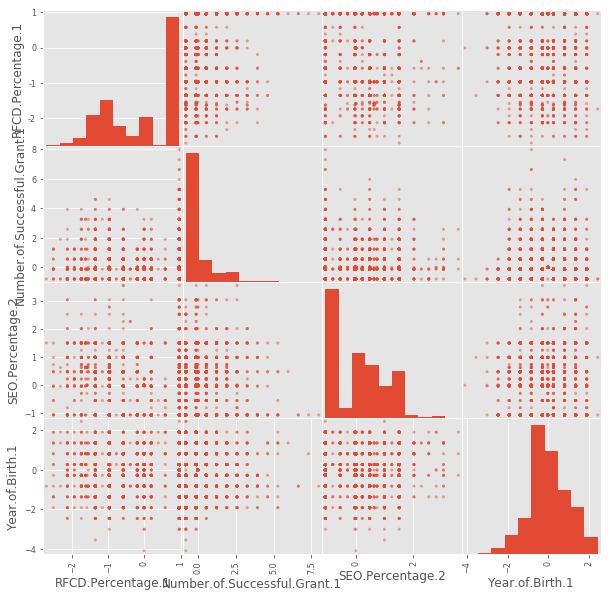

In [26]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

###### Note 
As you can see from the graphs the distributions and scatter plots of the variables have the exact same shape, as before the scaling. However the range of value across the variables is more or less the same across different variables.

###### Let's try testing again

In [27]:
#stacking numerical and categorical features
X_train_scaled = np.hstack( (X_train_real_scaled, X_train_cat_oh) )
X_test_scaled = np.hstack( (X_test_real_scaled, X_test_cat_oh) )

In [28]:
%%time
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty' : ['l1']}
#GridSearchCV with zero fillna
optimizer_mean.fit(X_train_scaled, y_train)
print (optimizer_mean)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
CPU times: user 10.7 s, sys: 1.17 s, total: 11.9 s
Wall time: 6.14 s


In [29]:
#GridSearchCV with zero fillna
print ('Best parameter for GridSearchCV with scaled num parameters', optimizer_mean.best_params_)
roc_auc_score_scaled = roc_auc_score(y_test, optimizer_mean.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print ('roc_auc_score', roc_auc_score_scaled)

Best parameter for GridSearchCV with scaled num parameters {'C': 0.5, 'penalty': 'l1'}
roc_auc_score 0.8892688371356343


## Dependent variable investigation.

Classification algorithms can be very sensitive to "imbalanced" classes.

The reasons are: 
    - Regression algorithms are built to minimize errors. Since the probability of instances belonging to the majority class is significantly high in imbalanced data set, the algorithms are much more likely to classify new observations to the majority class.
    - Cost of false negative is much higher than false positive. Rejecting one good applicant before human can look over the application is much worse than reviewing a couple extra applications  

In [30]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


Obviously, the classes are not balanced.

There's two ways to solve this problem:
- Method 1: add additional weight to the minority class when training a model
- Method 2: add samples to the minority class, while the sample size of of both classes don't match

### Balancing classes: method 1.

sklearn.LogisticRegression() has a very handy method for adding additional weight to minority class (adding a parameter class_weight='balanced')


In [31]:
#GridSearchCV parameters
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty' : ['l1']}
cv = 3
estimator = LogisticRegression(class_weight='balanced')

In [32]:
%%time
#GridSearchCV with balanced weights
optimizer = GridSearchCV(estimator, param_grid, cv=cv)
optimizer.fit(X_train_scaled, y_train)
print (optimizer)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
CPU times: user 6.44 s, sys: 562 ms, total: 7.01 s
Wall time: 3.75 s


In [33]:
#GridSearchCV with balanced weights
print ('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_bal1 = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print ('roc_auc_score', roc_auc_score_bal1)

Best parameter for GridSearchCV with balanced weights {'C': 0.5, 'penalty': 'l1'}
roc_auc_score 0.8896796514512758


### Balancing classes: method 2.

Pretty sure there's bootstraping methods that already exist within Python libraries, but I'll do it myself for the sake of practice working with list and dataframes

In [34]:
#generating new indices for class 1
np.random.seed(0)
num_of_indices = np.sum(y_train==0) - np.sum(y_train==1)
indices_to_add = np.random.randint(np.sum(y_train==1)+1, size=num_of_indices)
X_train_to_add = X_train_scaled[indices_to_add]
y_train_to_add = y_train.iloc[indices_to_add]
print (y_train_to_add.shape)
print (y_train.shape)

#new X, y train
X_train_balanced = np.vstack( (X_train_scaled, X_train_to_add) )
y_train_balanced = np.append(y_train, y_train_to_add)
print (X_train_balanced.shape, X_train_scaled.shape)
print (y_train_balanced.shape, y_train.shape)

(432,)
(4200,)
(4632, 5606) (4200, 5606)
(4632,) (4200,)


In [35]:
#GridSearchCV with balanced weights
optimizer = GridSearchCV(estimator, param_grid, cv=cv)
optimizer.fit(X_train_balanced, y_train_balanced)
print (optimizer)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [36]:
#GridSearchCV with balanced weights
print ('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_bal2 = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print ('roc_auc_score', roc_auc_score_bal2)

Best parameter for GridSearchCV with balanced weights {'C': 1, 'penalty': 'l1'}
roc_auc_score 0.8875538111070825


###### We can see that there was not much of an improvement on test data after resampling or adding balanced weights to the model 
###### So what happened? And how much should we really trust the AUR_ROC metric on our test sample?
In theory, the model should be much better with balanced classes. The possible reason might be hidden in the way we broke down our initial dataset into test and train. 
As mentioned above, logistic regressor with regulizer can be very sensitive to imbalanced classes. So in our case (considering plain train_test_split splits dataset randomly), we know that our model will show worse results.

With that in mind, we need to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set

$Note$: intuitively, the test metrics (on balanced test sample) might show better or worse results than we previously saw. BUT we can trust this metric much more than in the case in unbalanced test sample. (for example model can be predicting 1s much better than 0s)

## Statification of the dataset

This time I will use an existing $stratify$ method within train_test_split

In [37]:
(X_train_real_mean, 
 X_test_real_mean, 
 y_train, y_test) = train_test_split(X_real_mean, y, 
                                     test_size=0.3, 
                                     random_state=0, stratify=y)

(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0, stratify=y)
print ("Numerical train: ",X_train_real_mean.shape, " Numerical test: ", X_test_real_mean.shape)
print ("Categorical train: ",X_train_cat_oh.shape, " Categorical test: ",X_test_cat_oh.shape)
print ("Target train:", y_train.shape , "Target test: ",y_test.shape )

Numerical train:  (4200, 13)  Numerical test:  (1800, 13)
Categorical train:  (4200, 5593)  Categorical test:  (1800, 5593)
Target train: (4200,) Target test:  (1800,)


In [38]:
encoder = StandardScaler()

X_train_real_scaled = encoder.fit_transform(X_train_real_mean)
X_test_real_scaled = encoder.fit_transform(X_test_real_mean)

#stacking numerical and categorical features
X_train_scaled = np.hstack( (X_train_real_scaled, X_train_cat_oh) )
X_test_scaled = np.hstack( (X_test_real_scaled, X_test_cat_oh) )

print (X_train_scaled.shape, X_test_scaled.shape)

(4200, 5606) (1800, 5606)


In [39]:
#GridSearchCV parameters
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1']}
cv = 3
estimator = LogisticRegression(class_weight='balanced')

In [40]:
%%time
optimizer = GridSearchCV(estimator, param_grid, cv=cv)
optimizer.fit(X_train_scaled, y_train)
print (optimizer)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
CPU times: user 7.13 s, sys: 736 ms, total: 7.87 s
Wall time: 4.45 s


In [41]:
#GridSearchCV
print ('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_strat = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print ('roc_auc_score:', roc_auc_score_strat)

Best parameter for GridSearchCV with balanced weights {'C': 0.5, 'penalty': 'l1'}
roc_auc_score: 0.8782005831455026


### Note: intuitively, the test metrics (on balanced test sample) might show better or worse results than we previously saw. BUT we can trust this metric much more than in the case in unbalanced test sample. For example, model can be predicting 1s much better than 0s and given there's much much more 1s in the test sample, the test metric will be biased

## Transforming the variables

###### That's all great and nice but what if our separating surface is non linear?? Should jump to more complex classifiers like RandomForest, GradientBooster, neural nets, etc? 

Would a great idea to try out many algorithms to see which one would perform better. But the purpose of this notebook is to learn how to pre-process data before feeding it into linear models.

There's a lot of methods to transfrom attributes, so that a more complex separating surface can be achieved. I will use one of the most widely used ones: Polynomial Features. The method is used to generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, for $p=2$ the transformation looks like this: 

$$ \phi(x_i) = [x_{i,1}^2, ..., x_{i,D}^2, x_{i,1}x_{i,2}, ..., x_{i,D} x_{i,D-1}, x_{i,1}, ..., x_{i,D}, 1] $$



### Polynomial Features

Just looking a the data, in theory, there shouldn't be any non-linear dependancies(features) that would seraiously affect if the candidate is chosen to have a grant. Polynomial models usually have a tendency to overfit really fast and then show high variance on test sample. So I'll just try out p=2 and p=3.

In [50]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2)

data_train_poly = transform.fit_transform(X_train_real_mean)
data_test_poly = transform.transform(X_test_real_mean)

encoder = StandardScaler()

data_train_poly_scaled = encoder.fit_transform(data_train_poly)
data_test_poly_scaled = encoder.fit_transform(data_test_poly)

#stacking numerical and categorical features
data_train_poly_full = np.hstack( (data_train_poly_scaled, X_train_cat_oh) )
data_test_poly_full = np.hstack( (data_test_poly_scaled, X_test_cat_oh) )

print(data_train_poly_full.shape, data_test_poly_full.shape)

(4200, 5698) (1800, 5698)


In [51]:
#GridSearchCV parameters
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1']}
cv = 3
estimator = LogisticRegression(class_weight='balanced')

In [52]:
%%time
optimizer = GridSearchCV(estimator, param_grid, cv=cv)
optimizer.fit(data_train_poly_full, y_train)
print (optimizer)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
CPU times: user 17.5 s, sys: 691 ms, total: 18.2 s
Wall time: 14 s


In [53]:
#GridSearchCV
print ('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_poly = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(data_test_poly_full)[:, 1])
print ('roc_auc_score', roc_auc_score_poly)

Best parameter for GridSearchCV with balanced weights {'C': 0.5, 'penalty': 'l1'}
roc_auc_score 0.8941726236804756


# Summary


At this point we've looked at most common ways to preprocess data before feeding it into linear models.

The main milestones:
- filling the missing values
- tranforming categorical features of the dataset
- Scaling
- Balancing samples: balancing weights vs randomly over-sampling minority class
- stratification of samples 

Those steps are should be performed every time, when you're planning to use linear methods as well as most of the existing ML algorithms.

Let's look at how the plain Logistic Regressor would perform!

In [46]:
(X_train_real_mean, 
 X_test_real_mean, 
 y_train, y_test) = train_test_split(X_real_mean, y, 
                                     test_size=0.3, 
                                     random_state=0)

(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)
X_train = np.hstack( (X_train_real_scaled, X_train_cat_oh) )
X_test = np.hstack( (X_test_real_scaled, X_test_cat_oh) )


L = LogisticRegression()
L.fit(X_train,y_train)


print(roc_auc_score(y_test, L.predict_proba(X_test)[:, 1]))

0.8550741136248051


## Awesome! We've acheived 85 to almost 90 improvement on ROC-AUC score